In [3]:
import os
import sys
import pandas as pd
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(os.path.abspath(".."))
import packages.Preprocesamiento as ppr

In [4]:
datos = ppr.leer_datos('cancellation_data_for_mondragon_unibertsitatea_2024.csv', origen="org")
datos

,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,travel_agency_name,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
booked_at,,,,,,,,,,,,,,,,,,,,,
"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,Booking.com,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,Booking.com,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,Booking.com,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,Booking.com,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,Booking.com,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Oct 13, 2023, 13:38","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",79,1,December,Sunday,4,0,telephone,Booking.com,...,1,yes,no,0,169.6,169.6,checked_out,NaN,NaN,NaN
"Oct 13, 2023, 13:38","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",79,1,December,Sunday,4,0,telephone,Booking.com,...,1,yes,no,0,169.6,169.6,checked_out,NaN,NaN,NaN
"Oct 17, 2023, 08:36","Dec 31, 2023, 15:00","Jan 1, 2024, 11:00",75,1,December,Sunday,5,0,direct_channel,NaN,...,1,yes,no,0,647.28,647.28,checked_out,NaN,NaN,NaN


In [3]:
print(datos.shape)
datos.columns

(56448, 35)


Index(['checkin_time', 'checkout_time', 'lead_time', 'lenght_of_stay',
       'checkin_month', 'checkin_day', 'adult_count', 'child_count', 'origin',
       'travel_agency_name', 'requested_category', 'requested_category_name',
       'asset', 'asset_type', 'brand', 'asset_opening_date', 'available_units',
       'business_segment', 'rate', 'rate_group_name', 'rate_type',
       'completed_entry_forms_count', 'all_entry_forms_completed',
       'last_entry_form_completed_at', 'returning_inhabitant', 'recurrence',
       'libere_community', 'bought_products', 'product_count',
       'reservation_net_value', 'total_adr', 'status', 'cancelled_at',
       'cancellation_reason', 'cancellation_lead_time'],
      dtype='object')

In [5]:
#Paleta de colores
paleta_colores = ['#7DBFB3','#644D44', '#AFBE84', '#C2A18A', '#B17C81']

In [6]:
ruta = r"C:\Users\alari\OneDrive - Mondragon Unibertsitatea\RETO 6\DOCUMENTOS\LATEX\imagenes"

ANALISIS DE LA VARIABLE OBJETIVO (STATUS)

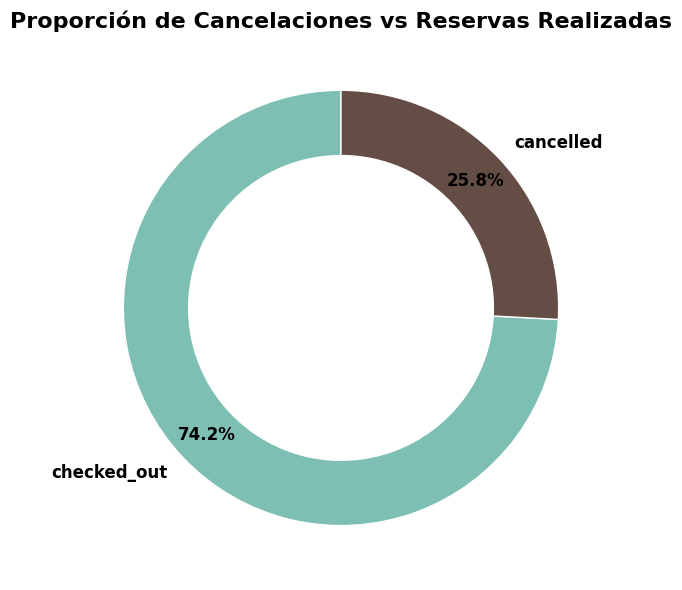

In [9]:
#Grafico 1
#Es la foto general de la salud del negocio. Esto justifica si el problema es grande o si el modelo es muy rentable.
#Ver el porcentaje de cancelaciones vs. estancias completadas (Si hay muy pocas cancelaciones (ej. 5%), el modelo tendrá dificultades.)
conteo = datos['status'].value_counts()
etiquetas = conteo.index
tamano = conteo.values

colores_donut = [paleta_colores[0], paleta_colores[1]]
plt.figure(figsize=(10, 6))

plt.pie(tamano, labels=etiquetas, colors=colores_donut, autopct='%1.1f%%', startangle=90,  pctdistance=0.85, textprops={'fontsize': 12, 'fontweight': 'bold'},wedgeprops=dict(width=0.3, edgecolor='white')) 
plt.title('Proporción de Cancelaciones vs Reservas Realizadas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(ruta,'Proporción_de_Cancelaciones_vs_Reservas_Realizadas.png'))
plt.show()

# Observamos que Líbere tiene un problema serio de retención de clientes o de "falsas reservas" que bloquean el inventario, con un %25.8 de cancelaciones.

Factor Tiempo: ¿La anticipación influye en la cancelación?

C:\Users\alari\AppData\Local\Temp\ipykernel_12640\268023257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='status', y='lead_time', palette=paleta_colores, showfliers=False)
C:\Users\alari\AppData\Local\Temp\ipykernel_12640\268023257.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(data=datos, x='status', y='lead_time', palette=paleta_colores, showfliers=False)


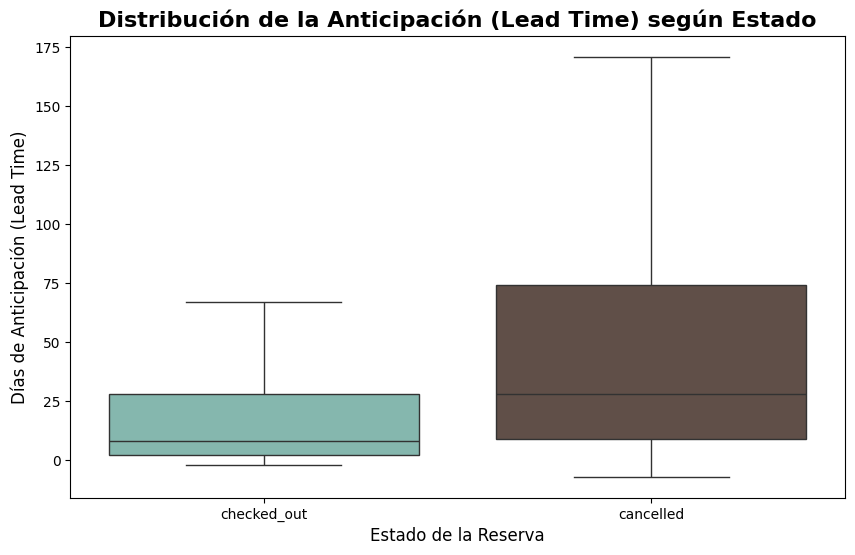

In [12]:
#Grafico 2
#Objetivo: Validar la hipótesis de que cuanto mayor es la anticipación (Lead Time), mayor es la probabilidad de cancelar.

plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='status', y='lead_time', palette=paleta_colores, showfliers=False)

plt.title('Distribución de la Anticipación (Lead Time) según Estado', fontsize=16, fontweight='bold')
plt.xlabel('Estado de la Reserva', fontsize=12)
plt.ylabel('Días de Anticipación (Lead Time)', fontsize=12)
plt.savefig(os.path.join(ruta,'Distribución_de_la_Anticipación_segun_Estado.png'))
plt.show()

#checked_out: Caja baja y pegada al cero: La gran mayoría de la gente que realmente va al hotel reserva con poca antelación. La caja está muy cerca de la parte inferior,
# lo que sugiere que las reservas exitosas suelen hacerse poco tiempo antes de la fecha de llegada.

#cancelled: Caja más alta y elevada: Fíjate que la caja marron está más arriba que la azul. Esto significa que las reservas canceladas suelen hacerse con mucha más antelación.
#"Cuanto mayor es la anticipación (Lead Time), mayor es la probabilidad de que la reserva sea cancelada."Las reservas de última hora son más seguras (es menos probable que se cancelen)

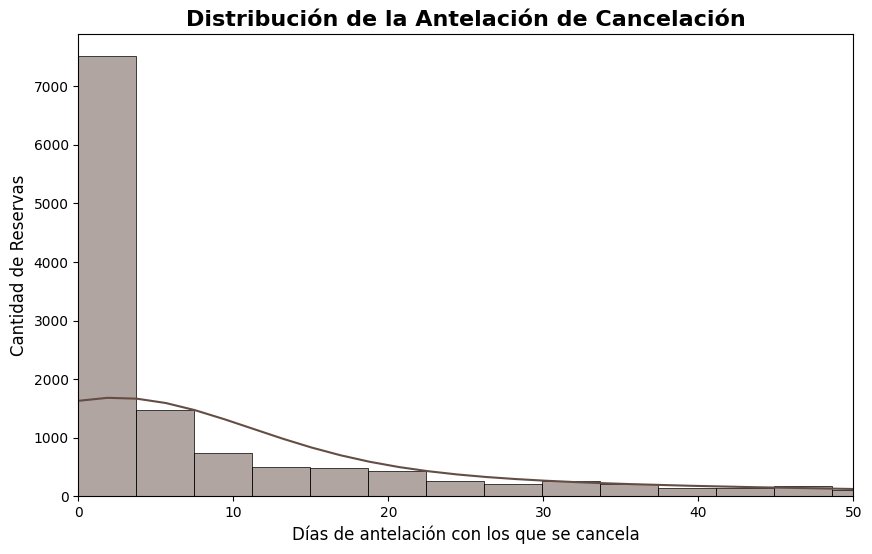

In [13]:
#Grafico 3
#Su utilidad principal es responder a la pregunta de negocio: "¿Tengo margen de maniobra cuando me cancelan?"
plt.figure(figsize=(10, 6))
df_cancelled = datos[datos['status'] == 'cancelled']
sns.histplot(data=df_cancelled, x='cancellation_lead_time', color=paleta_colores[1], bins=100, kde=True)

plt.xlim(0, 50)
plt.title('Distribución de la Antelación de Cancelación', fontsize=16, fontweight='bold')
plt.xlabel('Días de antelación con los que se cancela', fontsize=12)
plt.ylabel('Cantidad de Reservas', fontsize=12)
plt.savefig(os.path.join(ruta,'Distribución_de_la_Antelación_de_Cancelación.png'))
plt.show()
#El gráfico se acumula cerca del 0 o 1, es un problema grave. La habitación se queda vacía y se pierde ese dinero irremediablemente.
#Recomendar a Líbere cambiar su política a "No reembolsable si cancelas con menos de 3 días de antelación". Esto frenaría la fuga de dinero.

C:\Users\alari\AppData\Local\Temp\ipykernel_12640\2201742192.py:6: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.kdeplot(data=datos, x='lenght_of_stay', hue='status', palette=paleta_colores, fill=True, common_norm=False, alpha=0.3)


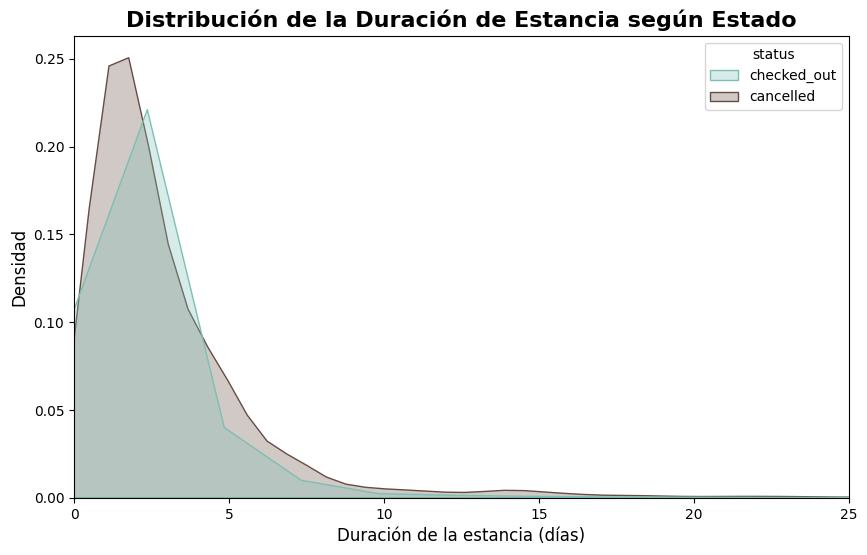

In [14]:
#grafico 4 Duración de la estancia.
#Ver si las estancias largas tienden a cancelarse más que las escapadas cortas.Ayuda a decidir si 
#se deben endurecer las políticas para estancias largas. Si alguien reserva 15 días y cancela, el daño económico es 
#mucho mayor que si cancela una estancia de 1 día, por lo que Líbere podría pedir un depósito mayor para estancias largas.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datos, x='lenght_of_stay', hue='status', palette=paleta_colores, fill=True, common_norm=False, alpha=0.3)

plt.xlim(0, 25)  
plt.title('Distribución de la Duración de Estancia según Estado', fontsize=16, fontweight='bold')
plt.xlabel('Duración de la estancia (días)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.savefig(os.path.join(ruta,'Distribución_de_la_Duración_de_Estancia_según_Estado.png'))
plt.show()

#se ve que cancelled es algo mas alto en dias bajos, lo que significa que "escapadas de fin de semana" son más volátiles y se cancelan más.

C:\Users\alari\AppData\Local\Temp\ipykernel_12640\2840627642.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  ax = sns.countplot(data=datos, x='checkin_month', hue='status', palette=paleta_colores)


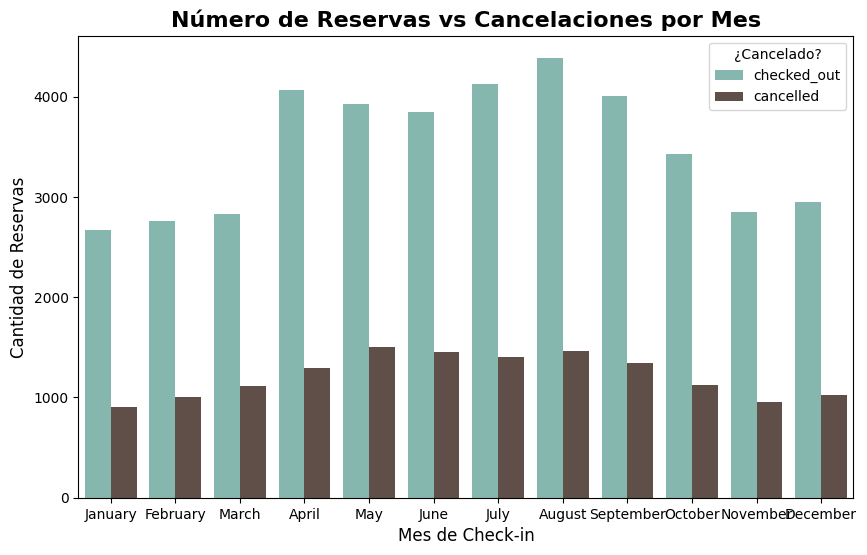

<Figure size 640x480 with 0 Axes>

In [15]:
# Grafico 5
#detectar si existe una estacionalidad en el riesgo. Ayuda a planificar el "overbooking" o las políticas de precios. Si saben que en julio se cancela muchísimo más,
# pueden vender más habitaciones de la cuenta (overbooking controlado) para compensar
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=datos, x='checkin_month', hue='status', palette=paleta_colores)

plt.title('Número de Reservas vs Cancelaciones por Mes',  fontsize=16, fontweight='bold')
plt.xlabel('Mes de Check-in', fontsize=12)
plt.ylabel('Cantidad de Reservas', fontsize=12)
plt.legend(title='¿Cancelado?')
plt.show()
plt.savefig(os.path.join(ruta,'Tasa_de_Cancelación_por_mes.png'))


Perfil Económico y de Producto

C:\Users\alari\AppData\Local\Temp\ipykernel_12640\1074358393.py:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=datos, x='total_adr', hue='status', palette=paleta_colores, kde=True, element="step", bins=50)


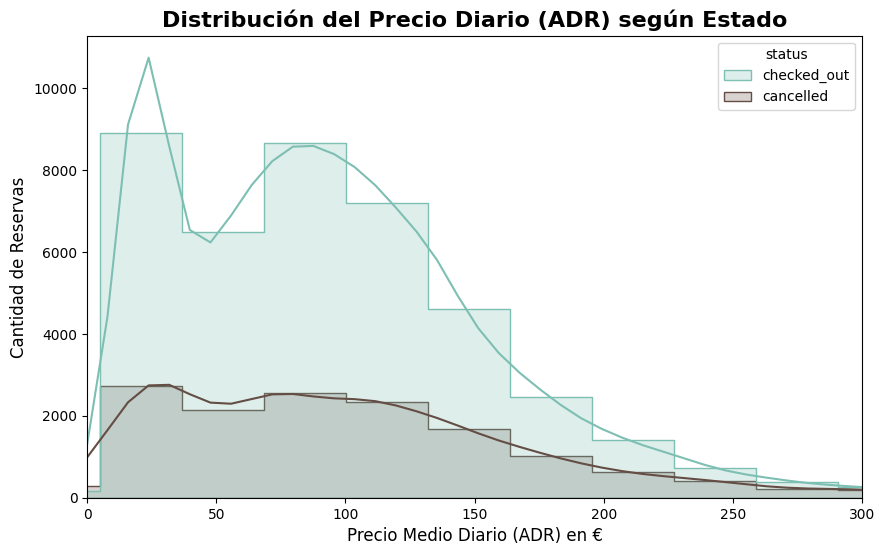

In [16]:
#Grafico 6
#Permite identificar si el riesgo de cancelación es mayor en las reservas de alto valor (caras). Si las reservas de 300€/noche se cancelan mucho más que las de 80€,
#Líbere pierde mucho más dinero del previsto y debería aplicar políticas de depósito más estrictas para precios altos

datos = datos.reset_index(drop=True)
datos['total_adr'] = pd.to_numeric(datos['total_adr'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='total_adr', hue='status', palette=paleta_colores, kde=True, element="step", bins=50)

plt.xlim(0, 300)

plt.title('Distribución del Precio Diario (ADR) según Estado', fontsize=16, fontweight='bold')
plt.xlabel('Precio Medio Diario (ADR) en €', fontsize=12)
plt.ylabel('Cantidad de Reservas', fontsize=12)
plt.savefig(os.path.join(ruta,'Distribución_del_Precio_Diario_según_Estado.png'))
plt.show()

#Fijaos en la forma de las dos distribuciones. Ambas tienen un pico muy fuerte en el rango de 30-40€ (probablemente camas de hostel) 
#y otro repunte en los 100€ (apartamentos estándar). Además, ambas descienden igual a medida que sube el precio.
#¿Qué significa esto? Significa que las curvas son casi idénticas. El comportamiento de cancelación no cambia según el precio.
#Nuestra hipótesis inicial era que quizás las reservas caras tenían más riesgo, pero los datos nos dicen lo contrario: un cliente que paga 40€ tiene 
#la misma probabilidad de cancelar que uno que paga 200€.

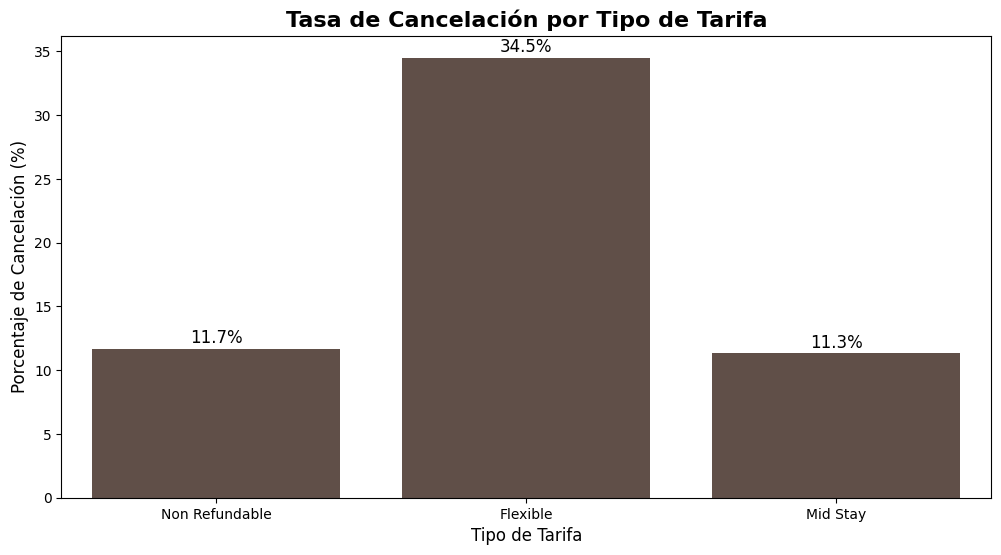

In [17]:
#Gráfico 7: Impacto del Tipo de Tarifa (RATE_TYPE)
#Si la tarifa Flexible tiene una tasa de cancelación bastante alta, Líbere tiene un problema de incertidumbre: muchas reservas son "falsas" o "por si acaso".
datos['is_cancelled'] = datos['status'].apply(lambda x: 100 if x == 'cancelled' else 0) #Crear una columna temporal numérica para calcular el porcentaje (0 = No, 100 = Sí)
plt.figure(figsize=(12, 6))


ax = sns.barplot(data=datos, x='rate_type', y='is_cancelled', color=paleta_colores[1], errorbar=None)

plt.title('Tasa de Cancelación por Tipo de Tarifa', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Tarifa', fontsize=12)
plt.ylabel('Porcentaje de Cancelación (%)', fontsize=12)

ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=1, fontsize=12)
plt.savefig(os.path.join(ruta,'Tasa_de_Cancelación_por_Tipo_de_Tarifa.png'))
plt.show()

#Barra "Flexible" muy alta, la gente reserva esta tarifa precisamente para tener la opción de cancelar. Confirma que este cliente es volátil.
#"De cada 100 personas que reservaron con tarifa Flexible, 34,5 cancelaron"

Perfil del Cliente (Identificación del perfil de fuga)

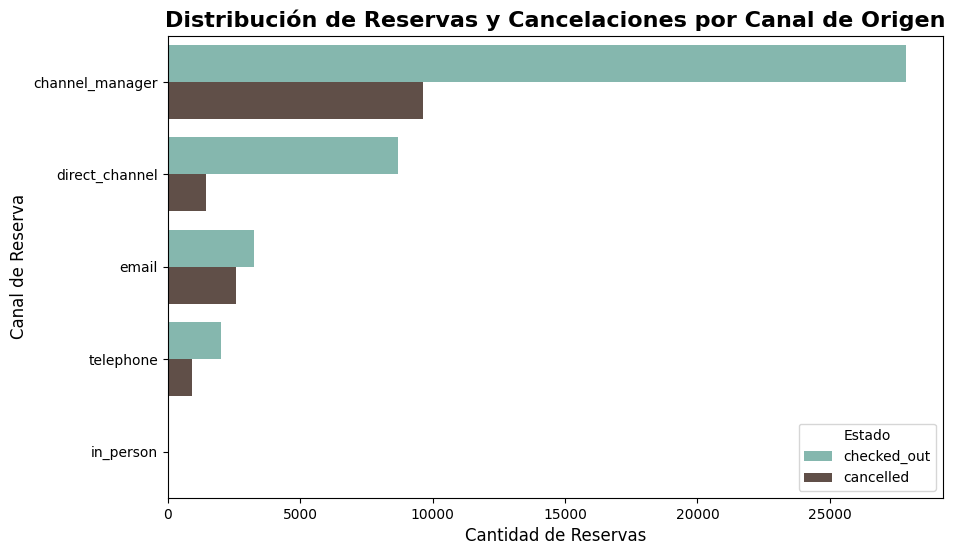

In [18]:
#Grafico 8
#Sirve para medir la calidad del tráfico. Líbere gasta dinero en marketing para atraer gente a su web (direct_channel) y paga comisiones a terceros (channel_manager)

plt.figure(figsize=(10, 6))
orden_canales = datos['origin'].value_counts().index

colores = {'checked_out': paleta_colores[0], 'cancelled': paleta_colores[1]}
sns.countplot(y='origin', hue='status', data=datos, palette=colores, order=orden_canales)

plt.title('Distribución de Reservas y Cancelaciones por Canal de Origen', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Reservas', fontsize=12)
plt.ylabel('Canal de Reserva', fontsize=12)
plt.legend(title='Estado', loc='lower right')
plt.savefig(os.path.join(ruta,'Distribución_de_Reservas_y_Cancelaciones_por_Canal_de_Origen.png'))
plt.show()

#"Channel Manager" (Booking, Expedia, etc.) es la barra más larga con diferencia dependen de terceros. Mucha cancelacion, porque en estas plataformas es demasiado fácil cancelar
#"Direct Channel" / Web propia. Estos son los clientes más valiosos. Han entrado a la web de Líbere, menos parte roja (proporcionalmente) que el Channel Manager. El cliente que se molesta en ir a tu web suele tener una intención de compra más firme.
#Email y telephone. Barras mucho más cortas. No son nada rentables ya que mas de la mitad de ellas son canceladas.
#El gráfico justifica invertir dinero en mover a los clientes del Channel Manager al Direct Channel. Si consiguen que reserven por la web, no solo ahorran comisión, sino que reducen drásticamente la probabilidad de cancelación.

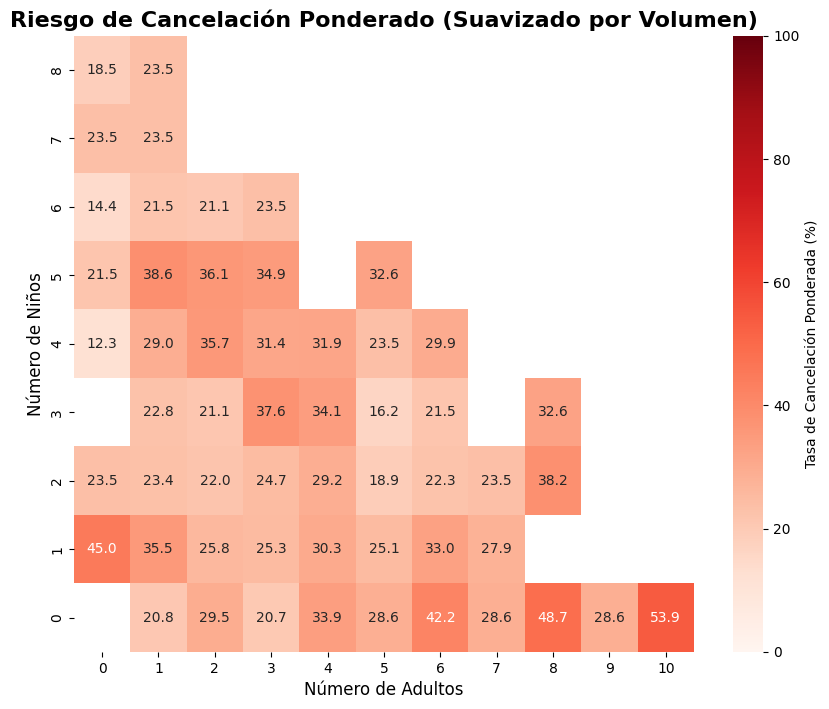

In [19]:
#Grafico 9
#Sirve para entender la logística del viajero. Las familias con niños suelen tener una logística más complicada (enfermedades de última hora, calendario escolar), 
#mientras que los viajeros de negocios o parejas (2 adultos, 0 niños) suelen ser más flexibles.

media_global = datos['is_cancelled'].mean()
tabla_medias = datos.pivot_table(index='child_count', columns='adult_count', values='is_cancelled', aggfunc='mean')
tabla_cantidades = datos.pivot_table(index='child_count', columns='adult_count', values='is_cancelled', aggfunc='count')
C = 10 
tabla_suavizada = (tabla_cantidades * tabla_medias + C * media_global) / (tabla_cantidades + C)

plt.figure(figsize=(10, 8))

sns.heatmap(tabla_suavizada, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Tasa de Cancelación Ponderada (%)'}, vmin=0, vmax=100)

plt.title('Riesgo de Cancelación Ponderado (Suavizado por Volumen)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Adultos', fontsize=12)
plt.ylabel('Número de Niños', fontsize=12)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(ruta,'Riesgo_de_Cancelación_Ponderado.png'))
plt.show()

#Los colores rojos intensos que vemos ahora son reales y preocupantes, porque están basados en datos sólidos (muchas personas).
#Los casos raros con poca gente se han suavizado hacia la media (colores más claros), eliminando el ruido visual.
#Esto nos permite ver que el verdadero foco de riesgo está en .


C:\Users\alari\AppData\Local\Temp\ipykernel_12640\3711079278.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=axes[0], x='libere_community', hue='status', data=datos, palette=paleta_colores)
C:\Users\alari\AppData\Local\Temp\ipykernel_12640\3711079278.py:14: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=axes[1], x='returning_inhabitant', hue='status', data=datos, palette=paleta_colores)


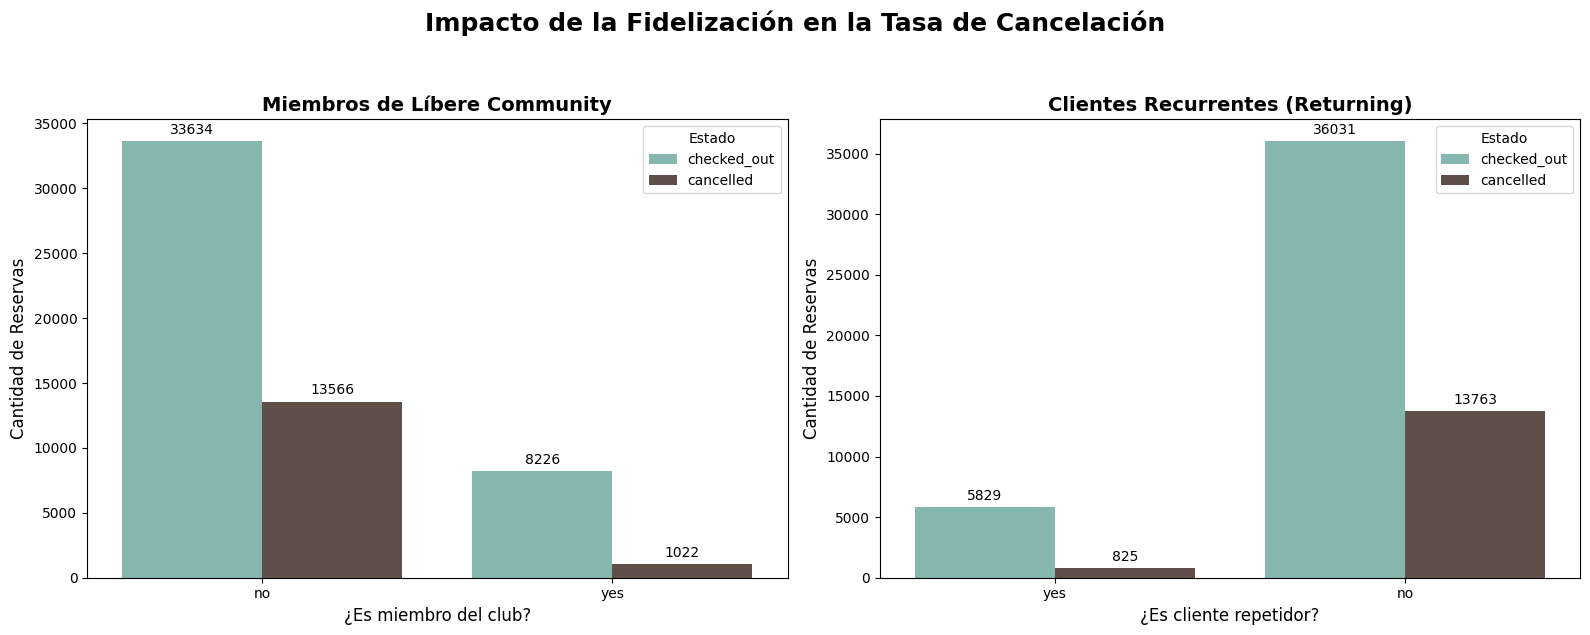

In [20]:
#Grafico 10
#Sirve para medir el retorno de inversión (ROI) de la fidelización. Líbere invierte dinero en su club (Líbere Community) y en marketing para que los clientes vuelvan.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(ax=axes[0], x='libere_community', hue='status', data=datos, palette=paleta_colores)
axes[0].set_title('Miembros de Líbere Community', fontsize=14, fontweight='bold')
axes[0].set_xlabel('¿Es miembro del club?', fontsize=12)
axes[0].set_ylabel('Cantidad de Reservas', fontsize=12)
axes[0].legend(title='Estado')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=3)

sns.countplot(ax=axes[1], x='returning_inhabitant', hue='status', data=datos, palette=paleta_colores)
axes[1].set_title('Clientes Recurrentes (Returning)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('¿Es cliente repetidor?', fontsize=12)
axes[1].set_ylabel('Cantidad de Reservas', fontsize=12)
axes[1].legend(title='Estado')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)

plt.suptitle('Impacto de la Fidelización en la Tasa de Cancelación', fontsize=18, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig(os.path.join(ruta,'Impacto_de_la_Fidelización_en_la_Tasa_de_Cancelación.png'))
plt.show()

#Grafico A: Compara a los usuarios "anónimos" frente a los que se han registrado en el club de fidelización de la empresa. La inmensa mayoría de 
#tus reservas las hacen personas que no pertenecen a la comunidad de Líbere. Son clientes puntuales.
#Grafico B: Compara a los clientes nuevos (primera visita) frente a los que ya se han alojado con Líbere antes (repetidores).
#El "False" (Gigante): Casi todo tu negocio depende de captar clientes nuevos constantemente (gente que viene por primera vez).
#El análisis de fidelización revela una fuerte dependencia de la captación de nuevos clientes. Como observamos en ambos gráficos, el volumen de reservas 
#provenientes de usuarios no fidelizados ('False') es inmensamente superior al de miembros del club o clientes repetidores ('True').

5. Factores Digitales / Proceso (Muy relevante para Líbere)

<Figure size 1000x600 with 0 Axes>

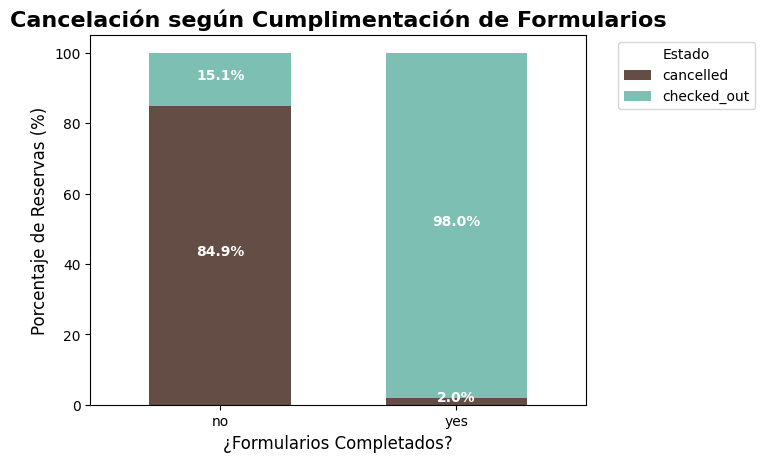

In [12]:
#Grafico 11. Probabilidad de cancelacion segun relleno de formulario

tabla_forms = pd.crosstab(datos['all_entry_forms_completed'], datos['status'], normalize='index') * 100

plt.figure(figsize=(10, 6))
ax = tabla_forms.plot(kind='bar', stacked=True, color=[paleta_colores[1], paleta_colores[0]], width=0.6)

plt.title('Cancelación según Cumplimentación de Formularios', fontsize=16, fontweight='bold')
plt.xlabel('¿Formularios Completados?', fontsize=12)
plt.ylabel('Porcentaje de Reservas (%)', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', padding=3, color='white', fontweight='bold')
plt.savefig(os.path.join(ruta,'Probabilidad_de_Cancelación_según_Cumplimentación_de_Formularios.png'))
plt.show()

#Sirve como detector temprano de "No Shows". Si el gráfico confirma que el 90% de los que no rellenan el formulario acaban cancelando (o no presentándose), 
#Líbere puede automatizar un sistema de alertas: "Si faltan 24h y no ha rellenado el formulario, mándale un WhatsApp urgente o libera la habitación".

<Figure size 1000x600 with 0 Axes>

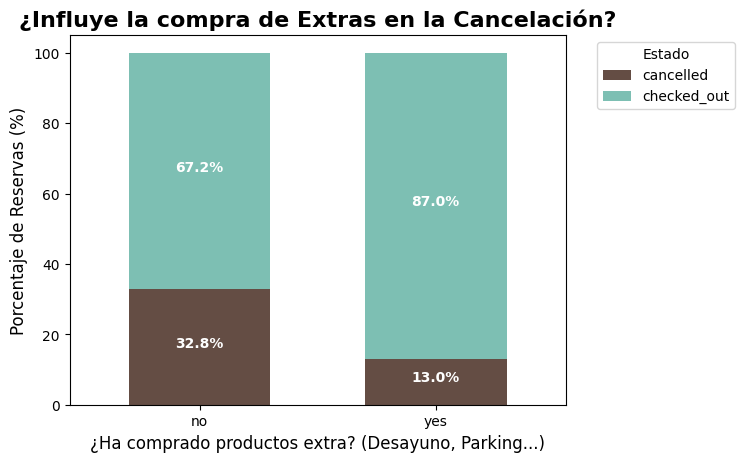

In [22]:
#Grafico 12 
#La barra de "Yes" (Compró productos) tiene una tasa de cancelación bajísima, significa que vender cross-selling (ventas cruzadas) no solo da más dinero, sino que blinda la reserva.
tabla_productos = pd.crosstab(datos['bought_products'], datos['status'], normalize='index') * 100

plt.figure(figsize=(10, 6))

ax = tabla_productos.plot(kind='bar', stacked=True, color=[paleta_colores[1], paleta_colores[0]], width=0.6)

plt.title('¿Influye la compra de Extras en la Cancelación?', fontsize=16, fontweight='bold')
plt.xlabel('¿Ha comprado productos extra? (Desayuno, Parking...)', fontsize=12)
plt.ylabel('Porcentaje de Reservas (%)', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', padding=3, color='white', fontweight='bold')
plt.savefig(os.path.join(ruta,'Influye_la_compra_de_Extras_en_la_Cancelación.png'))
plt.show()

C:\Users\alari\AppData\Local\Temp\ipykernel_12640\3889531893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tasa_por_edificio.values, y=tasa_por_edificio.index, palette="RdYlGn_r")


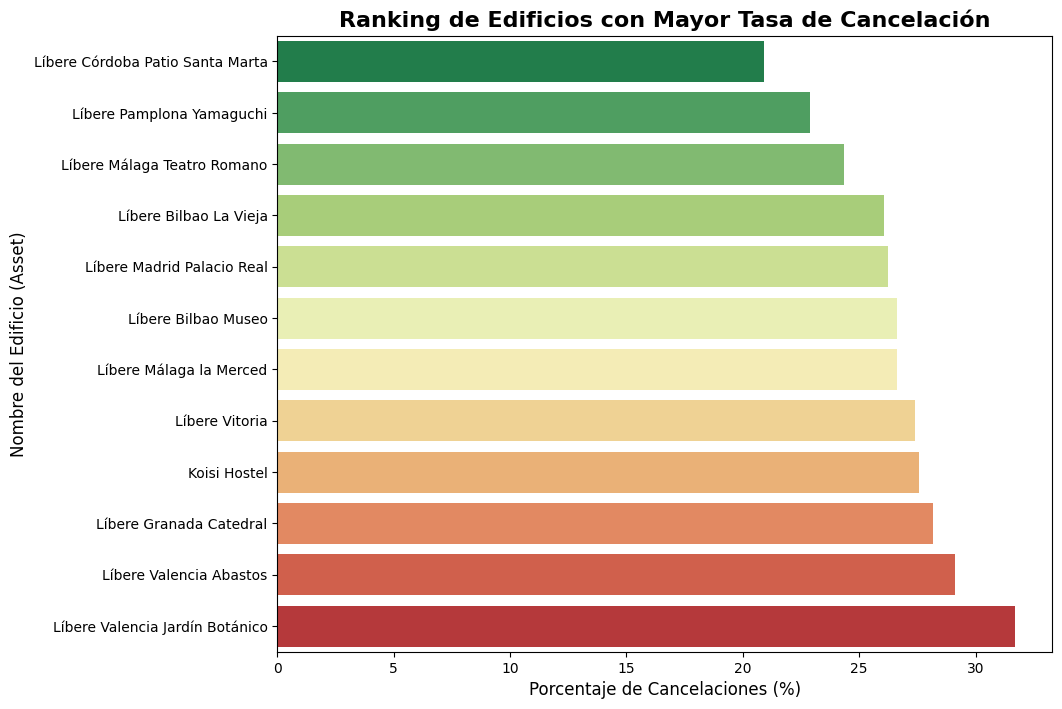

In [23]:
# 1. Calcular tasa de cancelación por activo
tasa_por_edificio = datos.groupby('asset')['status'].apply(lambda x: (x == 'cancelled').mean() * 100).sort_values()
plt.figure(figsize=(10, 8))

ax = sns.barplot(x=tasa_por_edificio.values, y=tasa_por_edificio.index, palette="RdYlGn_r")

# 4. Ajustes y Etiquetas
plt.title('Ranking de Edificios con Mayor Tasa de Cancelación', fontsize=16, fontweight='bold')
plt.xlabel('Porcentaje de Cancelaciones (%)', fontsize=12)
plt.ylabel('Nombre del Edificio (Asset)', fontsize=12)
plt.savefig(os.path.join(ruta,'Ranking_de_Edificios_con_Mayor_Tasa_de_Cancelación.png'))
plt.show()

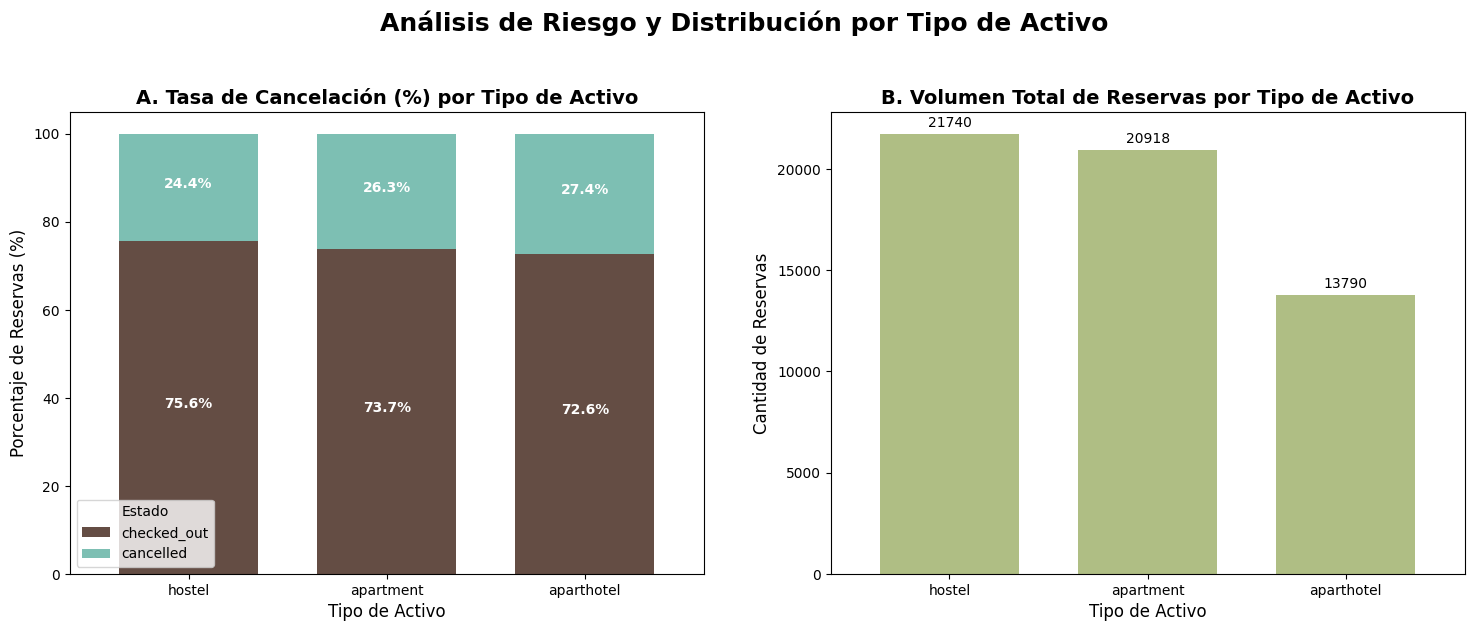

In [8]:
# Gráfico 14: Riesgo de Cancelación por Tipo de Activo
# Configuración del tamaño para los dos gráficos

orden_activos = ['hostel', 'apartment', 'aparthotel']
datos['asset_type'] = pd.Categorical(datos['asset_type'], categories=orden_activos, ordered=True)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- GRÁFICO A (TASA): Porcentaje ---
# Al haber definido el orden arriba, la tabla de contingencia ya sale ordenada
tabla_asset_type = pd.crosstab(datos['asset_type'], datos['status'], normalize='index') * 100

ax1 = tabla_asset_type[['checked_out', 'cancelled']].plot(
    kind='bar', stacked=True, color=[paleta_colores[1], paleta_colores[0]], width=0.7, ax=axes[0]
)
axes[0].set_title('A. Tasa de Cancelación (%) por Tipo de Activo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Activo', fontsize=12)
axes[0].set_ylabel('Porcentaje de Reservas (%)', fontsize=12)
axes[0].legend(title='Estado')
axes[0].tick_params(axis='x', rotation=0) 

for c in ax1.containers:
    axes[0].bar_label(c, fmt='%.1f%%', label_type='center', padding=3, color='white', fontweight='bold')

# --- GRÁFICO B (VOLUMEN): Cantidad ---
# Al ser categórico, el value_counts() se puede ordenar por el índice (que es el nombre del activo)
volumen_asset_type = datos['asset_type'].value_counts().sort_index()

ax2 = volumen_asset_type.plot(
    kind='bar', color=paleta_colores[2], width=0.7, ax=axes[1]
)
axes[1].set_title('B. Volumen Total de Reservas por Tipo de Activo', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tipo de Activo', fontsize=12)
axes[1].set_ylabel('Cantidad de Reservas', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)

# 4. Título superior y Guardado
plt.suptitle('Análisis de Riesgo y Distribución por Tipo de Activo', fontsize=18, fontweight='bold', y=1.05)
plt.savefig(os.path.join(ruta, 'figura_14_riesgo_volumen_activo.png'), dpi=300, bbox_inches='tight')
plt.show()